In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
import csv
import re
plt.style.use('ggplot')
#pd.set_option('max_columns', 200)
pd.options.display.max_columns = 200

Датасет общих данных активных клиентов за период 5 месяцев.

In [36]:
path = 'E:\Projects\Char\purchasing_activity\datasets/type_activity_2.csv'
df = pd.read_csv(path)

df.head()

,order_id,user_id,kol_tovarov,sum_paid,promocode,company,dni_do_oplati
0,331843,8897,133,34275.6,0,Ип Романовская Я.В,5
1,331843,8897,133,34275.6,0,Ип Романовская Я.В,6
2,331851,129385,31,9000.0,0,99,2
3,331851,129385,31,9000.0,0,99,1
4,331856,105884,46,25990.0,0,NaN,5


# Обработка датафрейма

In [37]:
# Смотрим размерность датасета
df.shape

(3186, 7)

In [38]:
# Переводим все значения в "company" в нижний регистр (единый формат)
df['company'] = df['company'].str.lower()
df['company'] = df['company'].str.strip()

In [39]:
df.head()

,order_id,user_id,kol_tovarov,sum_paid,promocode,company,dni_do_oplati
0,331843,8897,133,34275.6,0,ип романовская я.в,5
1,331843,8897,133,34275.6,0,ип романовская я.в,6
2,331851,129385,31,9000.0,0,99,2
3,331851,129385,31,9000.0,0,99,1
4,331856,105884,46,25990.0,0,NaN,5


In [40]:
df_com = df.copy()

In [41]:
# Собираем группы

ul = [r'ип', r'и.п.', r'ооо', r'fashion', r'мода', r'предприниматель', r'магазин', r'brandom', r'marula', r'saluto', r'и/п', r'.ru', r'prestige', 
      r'moda', r'икона стиля', r'шопоголики', r'секрет', r'shop', r'max&moda', r'мимили', r'pafos style', r'мбоусош', r'модлав', r'livetoy', r'комильфо',
      r'optshoppingspb', r'flёur', r'миледи', r'спирк', r'loop', r'профит к', r'marula', r'lmodel', r'tom-farr', r'зависть подруг', r'profitto',
      r'style', r'универмаг', r'адалин', r'мадоу', r'тдг', r'модница', r'стихия', r'сорока', r'царица', r'maгазин', r'кристал', r'текстиль и трикотаж', r'диазоний',
      r'уукжт', r'мини-отель', r'мц семья']

sp = [r'сп', r'sp', r'совместные', r'самозанятая', r'самозанятый', r'совместная', r'сз', r'вместе дешевле', r'самозанятость', r'закупашка', r'cп', r'сити 53']

fl = [r'физ', r'лично', r'фл', r'частное', r'себя', r'n.lindstedt', r'преподаватель']

tk = [r'сдэк', r'пэк', r'энергия', r'почта', r'ангара', r'почтой', r'сдек']

email = [r'@']

fio = [r'сергеевна', r'тамара', r'филатова', r'zaharovalidiya', r'батеха', r'александровна', r'бахвалова', r'лукьянова', r'белоусова', r'крылова', r'савицкая',
       r'самитова', r'елена', r'вакулина', r'романовская', r'галина', r'лисунова', r'ирина', r'ичетовкина', r'колесникова', r'панчуков']

In [ ]:
# Делаем замены по группам

df_com.loc[df_com['company'].isna(), 'company']= 'НЕ УКАЗАН'

df_com['company'][df_com['company'].str.contains(r'@', flags=re.IGNORECASE, regex=True)] = 'EMAIL'

for i in ul:
    df_com['company'][df_com['company'].str.contains(i, flags=re.IGNORECASE, regex=True)] = 'ЮЛ'
    
for i in sp:
    df_com['company'][df_com['company'].str.contains(i, flags=re.IGNORECASE, regex=True)] = 'СП'
    
for i in fl:
    df_com['company'][df_com['company'].str.contains(i, flags=re.IGNORECASE, regex=True)] = 'ФЛ'
    
for i in tk:
    df_com['company'][df_com['company'].str.contains(i, flags=re.IGNORECASE, regex=True)] = 'ТК'
    
for i in fio:
    df_com['company'][df_com['company'].str.contains(i, flags=re.IGNORECASE, regex=True)] = 'ФИО'

tag = ['ЮЛ', 'СП', 'ФЛ', 'ТК', 'ФИО', 'EMAIL', 'НЕ УКАЗАН']
df_com.loc[~df_com['company'].isin(tag), 'company'] = 'НЕ УКАЗАН'


In [45]:
# Количество дубликатов
df.duplicated().sum()

0

In [46]:
# Количество нулевых значений в столбцах
df_com.isna().sum()

order_id         0
user_id          0
kol_tovarov      0
sum_paid         0
promocode        0
company          0
dni_do_oplati    0
dtype: int64

# Исследуем данные

<Axes: title={'center': 'Распределение по количеству дней до оплаты заказа'}, xlabel='Дни от регистрации юзера до оплаты заказа', ylabel='Количество'>

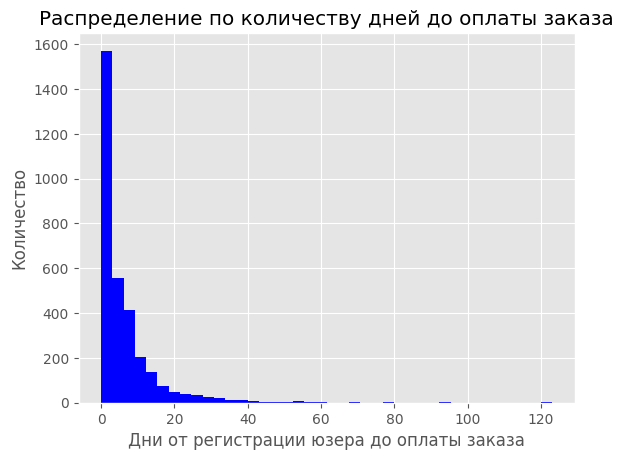

In [47]:
# Распределение по количеству дней от регистрации

df['dni_do_oplati'].plot(kind='hist', 
                            bins=40, 
                            title='Распределение по количеству дней до оплаты заказа',
                            xlabel='Дни от регистрации юзера до оплаты заказа',
                            ylabel='Количество',
                            color='blue')

<Axes: title={'center': 'Распределение по сумме чека'}, xlabel='Сумма заказа (руб)', ylabel='Количество'>

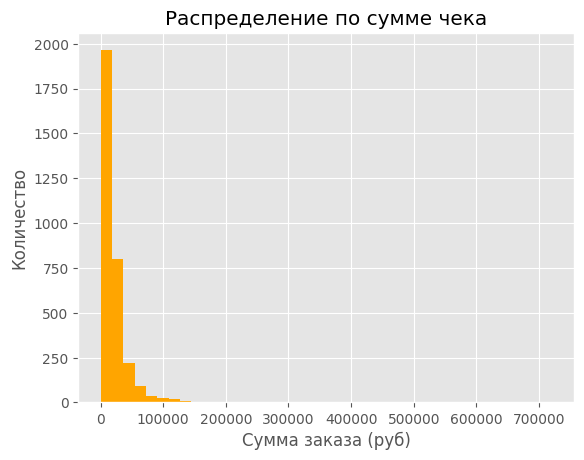

In [48]:
df['sum_paid'].plot(kind='hist', 
                    bins=40, 
                    title='Распределение по сумме чека',
                    xlabel='Сумма заказа (руб)',
                    ylabel='Количество',
                    color='orange')

<Axes: title={'center': 'Распределение по количеству товаров в заказе'}, xlabel='Сумма товаров в заказе (шт)', ylabel='Количество'>

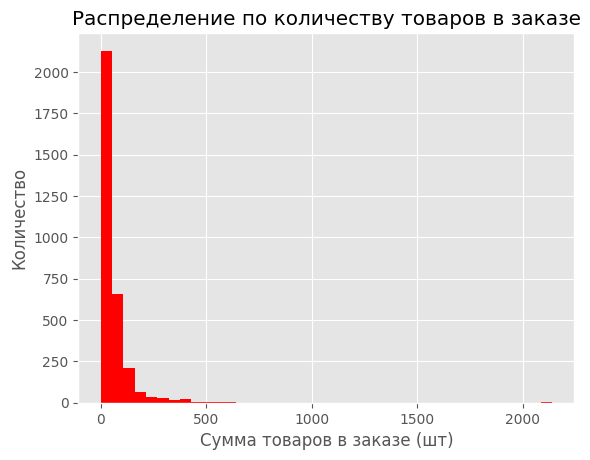

In [49]:
df['kol_tovarov'].plot(kind='hist', 
                        bins=40, 
                        title='Распределение по количеству товаров в заказе',
                        xlabel='Сумма товаров в заказе (шт)',
                        ylabel='Количество',
                        color='red')

C:\Users\2479\AppData\Local\Temp\ipykernel_16392\487027519.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(-100000.0, 0, '−100000'),
 Text(0.0, 0, '0'),
 Text(100000.0, 0, '100000'),
 Text(200000.0, 0, '200000'),
 Text(300000.0, 0, '300000'),
 Text(400000.0, 0, '400000'),
 Text(500000.0, 0, '500000'),
 Text(600000.0, 0, '600000'),
 Text(700000.0, 0, '700000'),
 Text(800000.0, 0, '800000')]

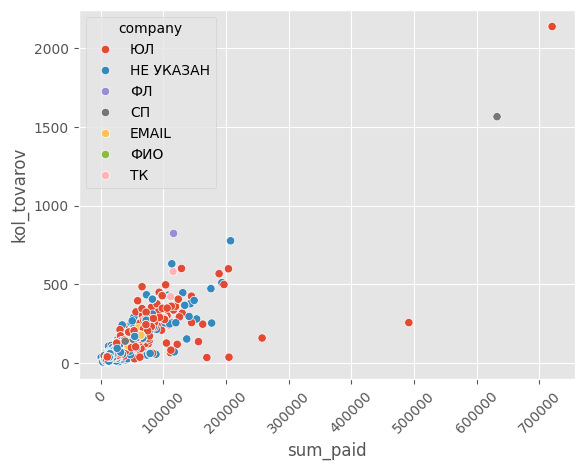

In [50]:
# Сравнение количества товаров в заказе и суммы заказа

fig = sns.scatterplot(x='sum_paid', 
                y='kol_tovarov',
                hue='company',
                data=df_com
                )

fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

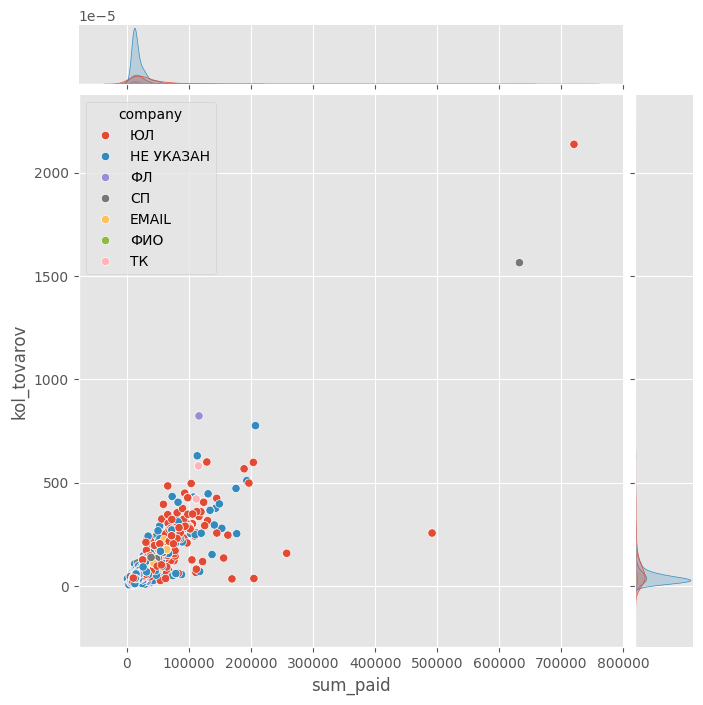

In [51]:
sns.jointplot(x='sum_paid', 
                y='kol_tovarov',
                hue='company',
                data=df_com,
                height=7, 
                ratio=8
                )


<Axes: xlabel='dni_do_oplati', ylabel='sum_paid'>

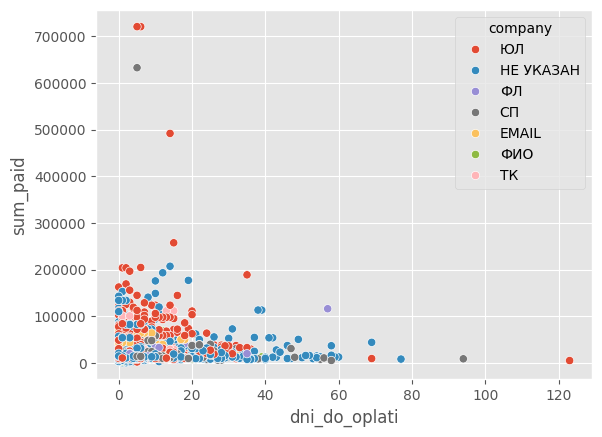

In [53]:
# Сравнение количества дней от заказа до оплаты и суммы заказа
# Влияние срока жизни клиента на размер чека

sns.scatterplot(x='dni_do_oplati', 
                y= 'sum_paid',
                hue='company',
                data=df_com
                )

In [15]:
df_com.head()

,order_id,user_id,kol_tovarov,sum_paid,promocode,company,dni_do_oplati
0,331843,8897,133,34275.6,0,ЮЛ,5
1,331843,8897,133,34275.6,0,ЮЛ,6
2,331851,129385,31,9000.0,0,НЕ УКАЗАН,2
3,331851,129385,31,9000.0,0,НЕ УКАЗАН,1
4,331856,105884,46,25990.0,0,НЕ УКАЗАН,5


C:\Users\1\AppData\Local\Temp\ipykernel_2096\1981214698.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_com[['company', 'dni_do_oplati']],


<Axes: xlabel='dni_do_oplati', ylabel='company'>

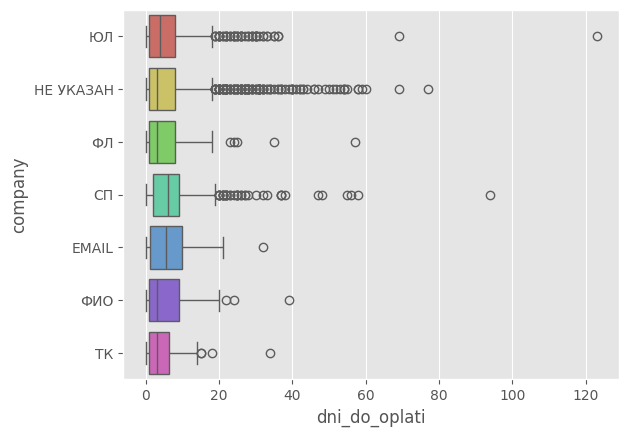

In [147]:
# Дни до оплаты по типу клиентов

sns.boxplot(data=df_com[['company', 'dni_do_oplati']], 
            x='dni_do_oplati', 
            y='company', 
            palette='hls')

In [149]:
type_cohort = df_com.groupby('company')['company'].agg(kol='count').reset_index().sort_values('kol', ascending=False)

type_cohort['doli'] = round(type_cohort['kol'] / sum(type_cohort['kol']), 2)
type_cohort

,company,kol,doli
1,НЕ УКАЗАН,1721,0.54
6,ЮЛ,746,0.23
2,СП,454,0.14
5,ФЛ,92,0.03
0,EMAIL,78,0.02
3,ТК,48,0.02
4,ФИО,47,0.01


# Дни от первого заказа

Нужно посмотреть, как меняется с течением времени:
- количество заказов, 
- количество товаров в заказе 
- сумма заказа

In [24]:
path = 'G:/py.projects/analytics/purchasing_activity/datasets/zakazi_davnost_nakop_itog.csv'
df_itog = pd.read_csv(path)

df_itog.head()

,user_id,dney_ot_pervogo_zakaza,zakazi,tovari,sum_paid
0,8753,0,1,15,4670.0
1,8753,3,2,21,9200.0
2,8753,10,3,33,11940.0
3,8753,36,4,41,13640.0
4,8753,45,5,47,19280.0


In [38]:
df_itog.shape

(6946, 5)

### Распределение количества товаров в заказе в зависимости от времени прошедшего с момента первого заказа
Здесь смотрим как ведут себя клиенты после первой покупки, покупают ли они больше. Появляется ли интерес?  
Количество расчитано накопительным итогом.

Text(0, 0.5, 'Количество товаров')

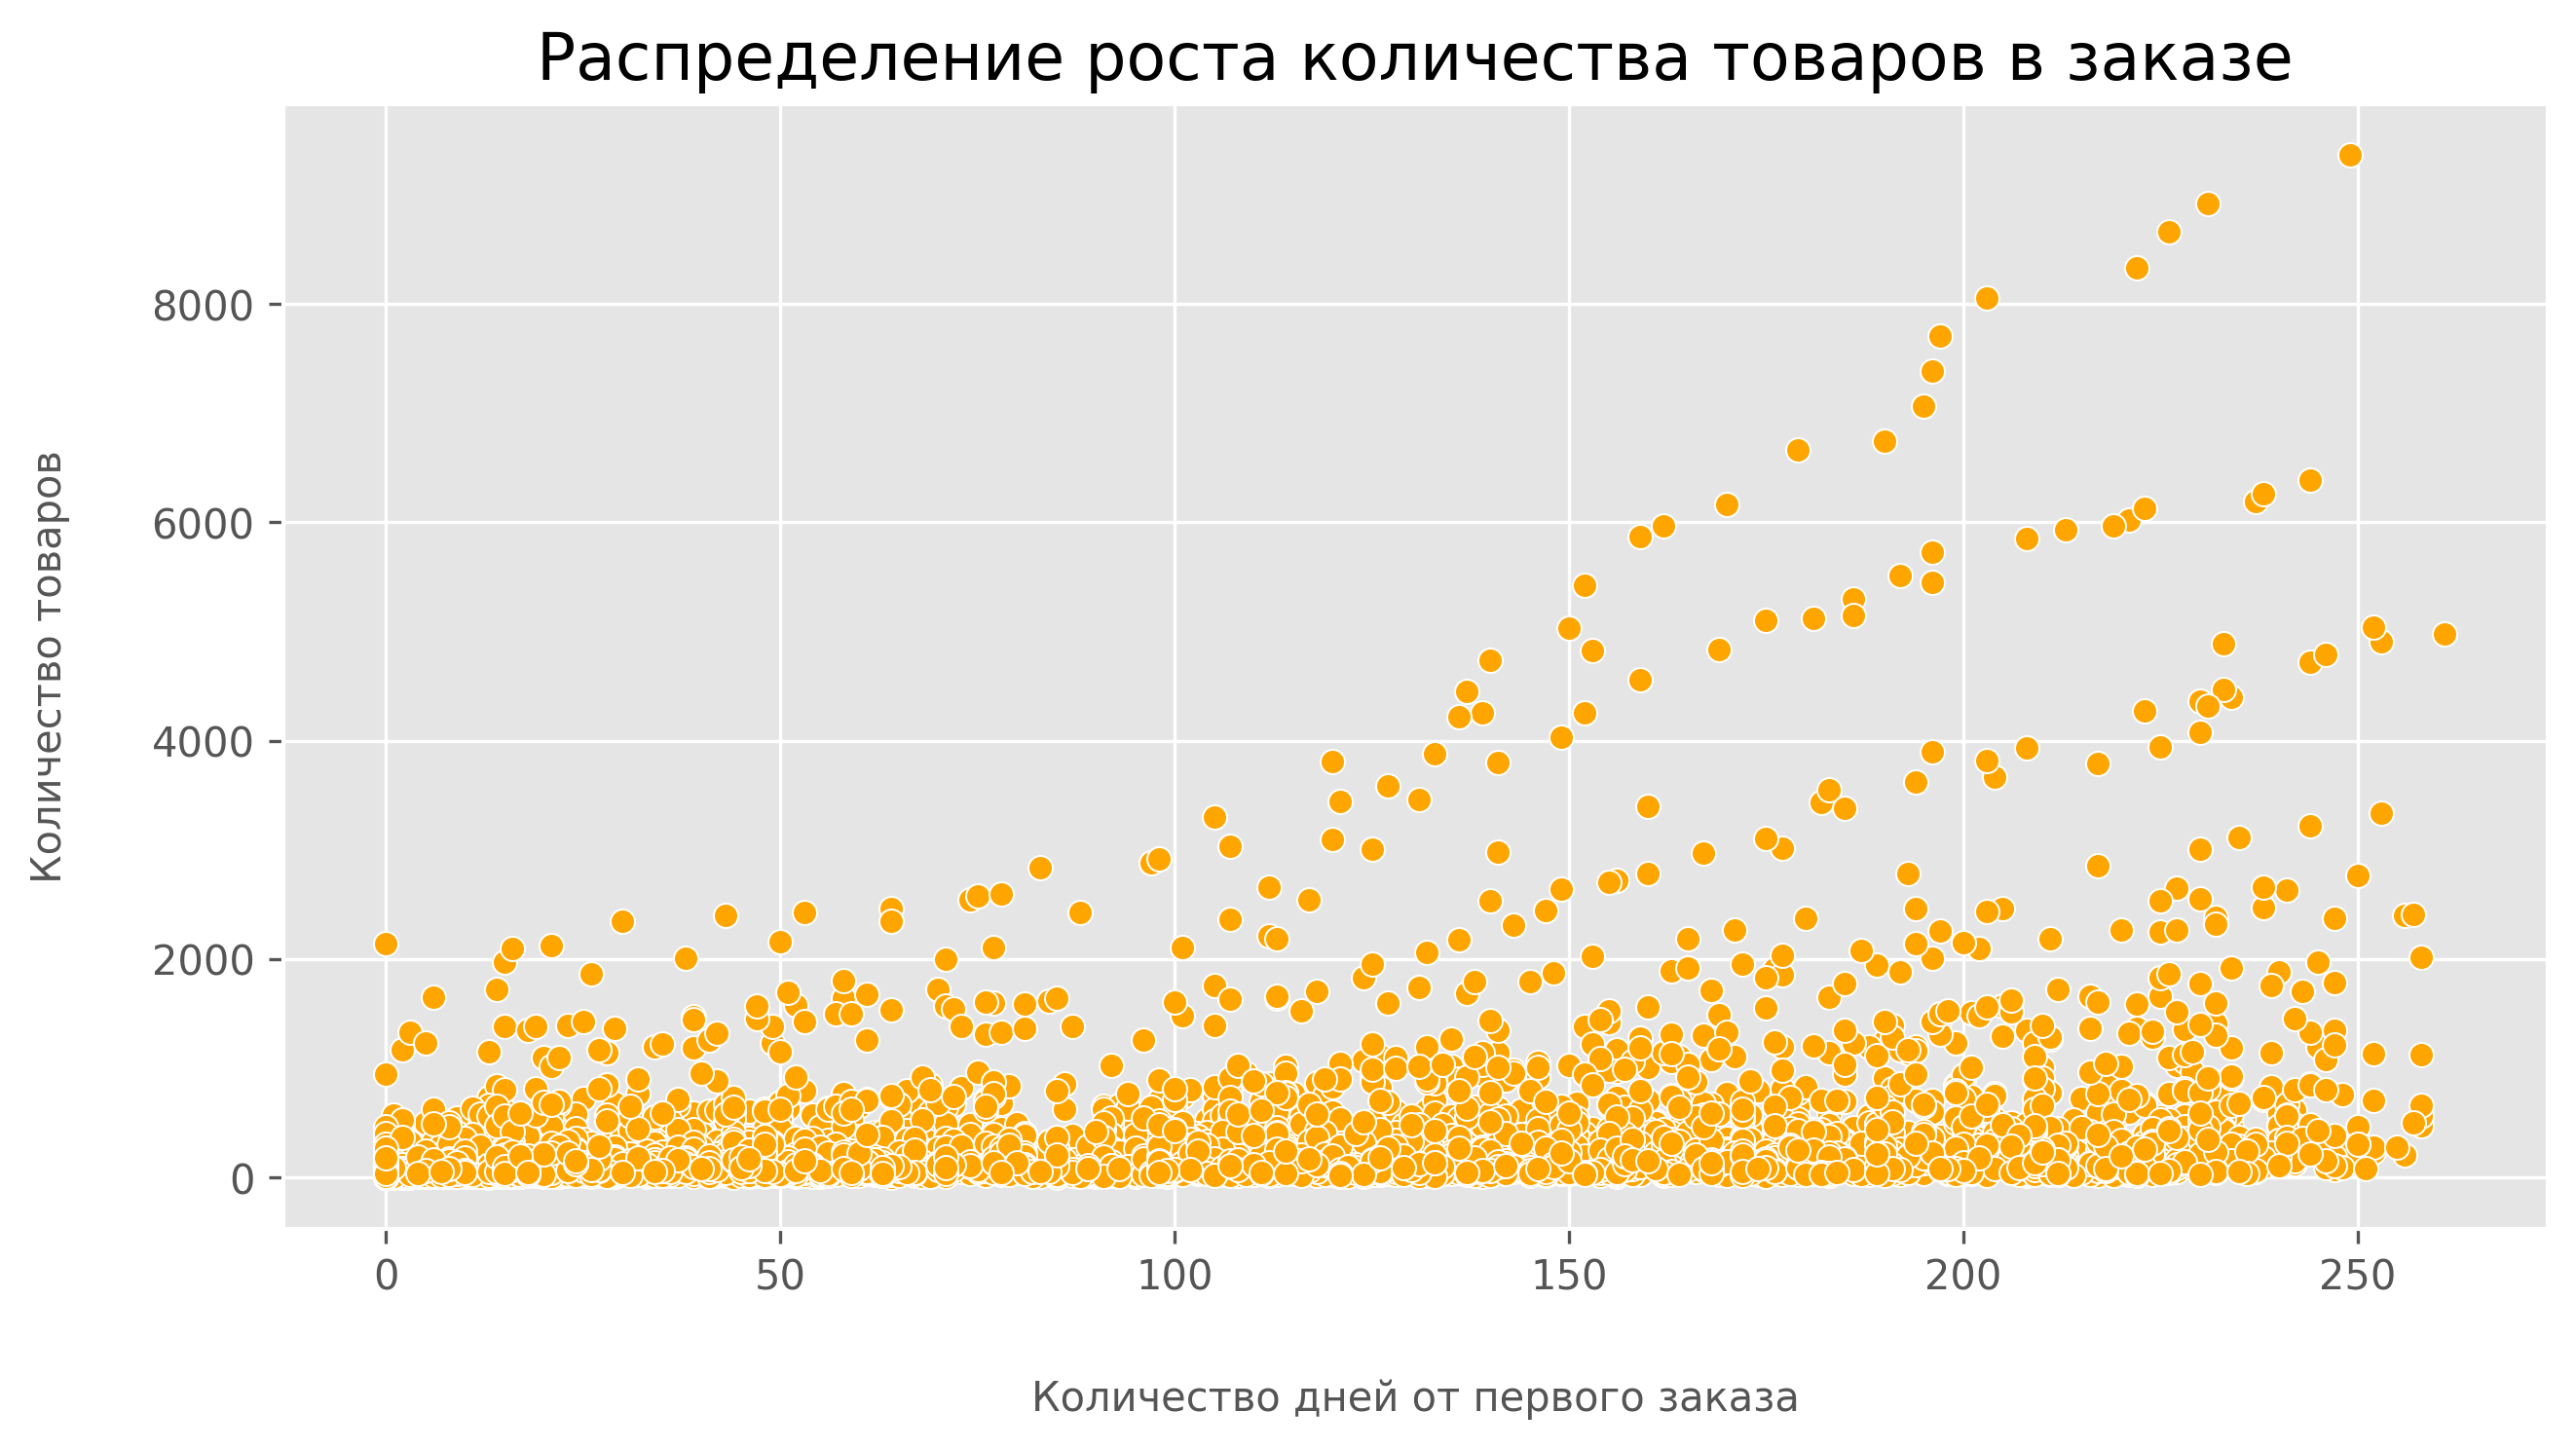

In [40]:
plt.figure(figsize=(10,5), dpi=300)

sns.scatterplot(x='dney_ot_pervogo_zakaza', 
                y='tovari',
                color='orange',
                data=df_itog
                )

plt.rcParams['axes.labelpad'] = 20
plt.title('Распределение роста количества товаров в заказе', fontsize=16)
plt.xlabel('Количество дней от первого заказа', fontsize=10)
plt.ylabel('Количество товаров', fontsize=10)

# Распределение номера покупки от давности

В данном случае смотрим сколько времени прошло от предыдущей покупки по каждому заказу и выводим среднее группируя по порядковому номеру заказа.

In [170]:
path = 'G:\py.projects\analytics\purchasing_activity\datasets/nomera_pokupok.csv'
df_num = pd.read_csv(path, sep=';')

#df_dni['dni_ot_pervogo_zakaza'] = df_dni['dni_ot_pervogo_zakaza'].astype(int)
# Преобразовать date_update в datetime
df_num['date_update'] = pd.to_datetime(df_num['date_update'])

df_num.head()

,order_id,user_id,date_update,sum_paid,num
0,324213,141588,2024-01-25 10:58:05,61598.0,1
1,326013,141600,2024-02-09 10:48:32,11640.0,1
2,322741,141608,2024-01-10 16:45:06,8880.0,1
3,322631,141609,2024-01-12 19:41:11,11120.0,1
4,322760,141613,2024-01-10 16:45:07,7670.0,1


In [171]:
# Преобразовать date_update в datetime
df_num['date_update'] = pd.to_datetime(df_num['date_update'])

# Сортировка по номеру, идентификатору пользователя и дате заказа
df_num_sort = df_num.sort_values(by=['num','date_update'])

# Рассчет разницы в днях между последовательными заказами для каждого пользователя
df_num_sort['days_since_last_order'] = df_num_sort.groupby('user_id')['date_update'].diff().dt.days

df_num_sort

,order_id,user_id,date_update,sum_paid,num,days_since_last_order
15,322911,141657,2024-01-10 10:59:18,11190.0,1,NaN
2,322741,141608,2024-01-10 16:45:06,8880.0,1,NaN
4,322760,141613,2024-01-10 16:45:07,7670.0,1,NaN
7,322804,141630,2024-01-10 18:25:21,11620.0,1,NaN
12,322851,141647,2024-01-11 12:07:59,11100.0,1,NaN
...,...,...,...,...,...,...
72,334570,141946,2024-05-08 12:02:17,19350.0,5,40.0
85,335078,141982,2024-05-21 10:33:16,15390.0,6,17.0
282,333299,142780,2024-05-25 12:08:15,37116.5,6,22.0
61,336072,141889,2024-06-03 16:43:35,17030.0,6,30.0


In [164]:
df_num_sort[df_num_sort['num'] == 1]

,order_id,user_id,date_update,sum_paid,num,days_since_last_order
15,322911,141657,2024-01-10 10:59:18,11190.0,1,NaN
2,322741,141608,2024-01-10 16:45:06,8880.0,1,NaN
4,322760,141613,2024-01-10 16:45:07,7670.0,1,NaN
7,322804,141630,2024-01-10 18:25:21,11620.0,1,NaN
12,322851,141647,2024-01-11 12:07:59,11100.0,1,NaN
...,...,...,...,...,...,...
461,335812,143895,2024-06-04 10:52:10,12650.0,1,NaN
466,336009,143927,2024-06-04 10:52:12,14670.0,1,NaN
449,336051,143746,2024-06-04 10:52:13,15140.0,1,NaN
396,336389,143477,2024-06-04 10:53:42,34406.8,1,NaN


In [180]:
df_droup = df_num_sort.groupby('num')[['days_since_last_order', 'sum_paid']].agg('median').reset_index()
df_droup

,num,days_since_last_order,sum_paid
0,1,NaN,12400.0
1,2,29.0,14420.0
2,3,26.0,13060.0
3,4,13.0,20980.0
4,5,14.0,19350.0
5,6,22.0,17030.0
6,7,3.0,50853.5


In [181]:
fig = px.scatter(df_droup, 
                 x='days_since_last_order', 
                 y='sum_paid',
                 size='num', 
                 size_max=30,
                 color='sum_paid')

fig.update_layout(
    title="Распределение номера покупки от давности",
    title_x = 0.5,
    xaxis_title="Среднее значение дней с прошлой покупки",
    yaxis_title="Средний чек"
    )

fig.show()

# Клиенты, которые престали покупать

Выбраны клиенты, которые зарегистрировались в 2024 году, делали покупки и не покупают уже более 3х месяцев.

In [51]:
path = 'E:\Projects\Char\purchasing_activity\datasets/stopped_buy_users.csv'
df_stop = pd.read_csv(path, sep=';')
df_stop.head()

,user_id,date_update,avg_tovarov,sum_paid,promo,day_last_buy,company,kol_orders
0,141588,2024-01-25 10:58:05.000,204,61598.0,0,132,ип,1
1,141600,2024-02-09 10:48:32.000,24,11640.0,0,117,сп стрекоза,1
2,141608,2024-01-10 16:45:06.000,7,8880.0,1,147,NaN,3
3,141609,2024-01-12 19:41:11.000,7,11120.0,0,145,NaN,2
4,141613,2024-02-28 11:53:52.000,5,9370.0,1,147,NaN,6


In [52]:
df_stop['user_id'].duplicated().sum()

0

### Опознание типов клиентов

In [53]:
ul = [r'ип', r'и.п.', r'ооо', r'fashion', r'мода', r'предприниматель', r'магазин', r'и/п', r'.ru', r'shop', r'moda',
      r'гранддресс', r'saluto', r'шоурум', r's&j', r'tom-farr']

sp = [r'сп', r'sp', r'совместные', r'самозанятая', r'самозанятый', r'совместная', r'сз', r'самозанятость', r'закупашка', r'cп']

fl = [r'физ', r'лично', r'фл', r'частное', r'себя']

tk = [r'сдэк', r'пэк', r'энергия', r'почта', r'ангара', r'почтой', r'сдек']

fio = [r'лукьянова', r'савицкая', r'ичетовкина']

In [ ]:
df_stop.loc[df_stop['company'].isna(), 'company']= 'НЕ УКАЗАН'
df_stop['company'][df_stop['company'].str.contains(r'@', flags=re.IGNORECASE, regex=True)] = 'EMAIL'

for i in ul:
    df_stop['company'][df_stop['company'].str.contains(i, flags=re.IGNORECASE, regex=True)] = 'ЮЛ'
    
for i in sp:
    df_stop['company'][df_stop['company'].str.contains(i, flags=re.IGNORECASE, regex=True)] = 'СП'
    
for i in fl:
    df_stop['company'][df_stop['company'].str.contains(i, flags=re.IGNORECASE, regex=True)] = 'ФЛ'
    
for i in tk:
    df_stop['company'][df_stop['company'].str.contains(i, flags=re.IGNORECASE, regex=True)] = 'ТК'
    
for i in fio:
    df_stop['company'][df_stop['company'].str.contains(i, flags=re.IGNORECASE, regex=True)] = 'ФИО'

tag = ['ЮЛ', 'СП', 'ФЛ', 'ТК', 'ФИО', 'EMAIL', 'НЕ УКАЗАН']
df_stop.loc[~df_stop['company'].isin(tag), 'company'] = 'НЕ УКАЗАН'

In [55]:
df_stop.head()

,user_id,date_update,avg_tovarov,sum_paid,promo,day_last_buy,company,kol_orders
0,141588,2024-01-25 10:58:05.000,204,61598.0,0,132,ЮЛ,1
1,141600,2024-02-09 10:48:32.000,24,11640.0,0,117,СП,1
2,141608,2024-01-10 16:45:06.000,7,8880.0,1,147,НЕ УКАЗАН,3
3,141609,2024-01-12 19:41:11.000,7,11120.0,0,145,НЕ УКАЗАН,2
4,141613,2024-02-28 11:53:52.000,5,9370.0,1,147,НЕ УКАЗАН,6


C:\Users\2479\AppData\Local\Temp\ipykernel_20804\85950974.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(fig.get_xticklabels(), rotation=45)


[Text(-50000.0, 0, '−50000'),
 Text(0.0, 0, '0'),
 Text(50000.0, 0, '50000'),
 Text(100000.0, 0, '100000'),
 Text(150000.0, 0, '150000'),
 Text(200000.0, 0, '200000'),
 Text(250000.0, 0, '250000'),
 Text(300000.0, 0, '300000'),
 Text(350000.0, 0, '350000'),
 Text(400000.0, 0, '400000')]

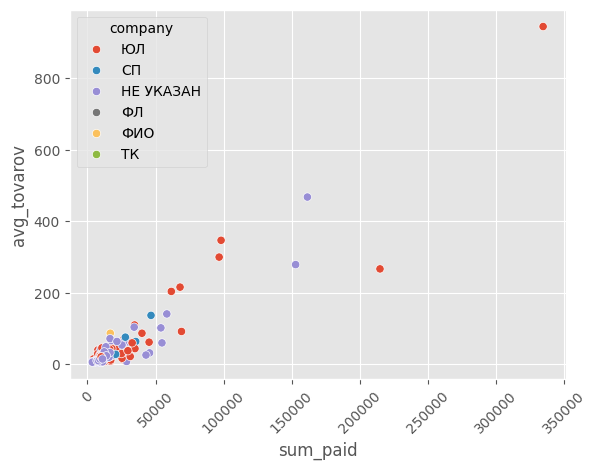

In [56]:
# Сравнение количества товаров в заказе и суммы заказа

fig = sns.scatterplot(x='sum_paid', 
                      y='avg_tovarov',
                      hue='company',
                      data=df_stop
                      )

fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

In [57]:
df_stop_doli = df_stop.groupby('company')['company'].agg(cnt='count').sort_values('cnt', ascending=False).reset_index()
df_stop_doli

,company,cnt
0,НЕ УКАЗАН,99
1,ЮЛ,42
2,СП,13
3,ФИО,3
4,ФЛ,2
5,ТК,1


In [58]:
df_stop_doli['dolia'] = df_stop_doli['cnt'] / df_stop_doli['cnt'].sum()

df_stop_doli

,company,cnt,dolia
0,НЕ УКАЗАН,99,0.61875
1,ЮЛ,42,0.26250
2,СП,13,0.08125
3,ФИО,3,0.01875
4,ФЛ,2,0.01250
5,ТК,1,0.00625


<BarContainer object of 6 artists>

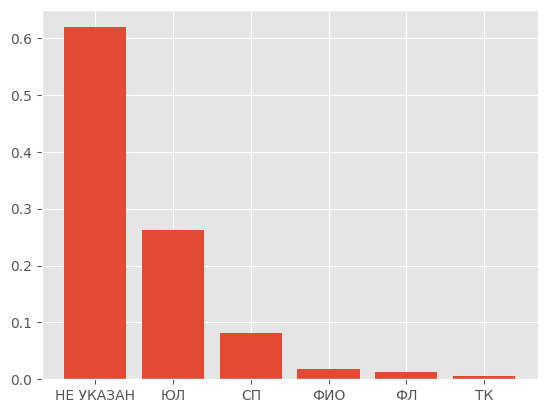

In [59]:
plt.bar(df_stop_doli['company'], df_stop_doli['dolia'])